# Taylor Models

- **Taylor model** $\equiv$ **Taylor polynomial** + **interval bound** of truncation error *and* rounding error

- https://github.com/JuliaIntervals/TaylorModels.jl

In [1]:
using TaylorModels

In [2]:
# Define the target function
f(x) = x * (x-1.1) * (x+2) * (x+2.2) * (x+2.5) * (x+3) * sin(1.7*x+0.5)

f (generic function with 1 method)

In [3]:
# give an expansion point and the interval nearing the expansion point.
a = -.5 .. 1 

[-0.5, 1]

In [4]:
# or use function interval
a = interval(-.5, 1)

[-0.5, 1]

In [5]:
?interval

search: interval Interval IntervalBox interval_part IntervalArithmetic



```
interval(a, b)
```

`interval(a, b)` checks whether [a, b] is a valid `Interval`, using the (non-exported) `is_valid_interval` function. If so, then an `Interval(a, b)` object is returned; if not, a warning is printed and the empty interval is returned.


In [6]:
# because the target function is a smooth function in the given interval, we can use taylor series to approximate it
n = 3  # the degree of the polynomials
x0 = mid(a)  # given the expansion point

0.25

In [7]:
?TaylorModel1

search: TaylorModel1 RTaylorModel1 TaylorModelN TaylorModels



```
TaylorModel1{T,S}
```

Absolute Taylor model in 1 variable, providing a rigurous polynomial approximation given by a Taylor polynomial `pol` (around `x0`) and an absolute remainder `rem` for a function `f(x)` in one variable, valid in the interval `dom`. This corresponds to definition 2.1.3 of Mioara Joldes' thesis.

Fields:

  * `pol`: polynomial approximation, represented as `TaylorSeries.Taylor1`
  * `rem`: the interval bound
  * `x0` : expansion point
  * `dom`: domain, interval over which the Taylor model is defined / valid

The approximation $f(x) = p(x) + \Delta$ is satisfied for all $x\in \mathcal{D}$ ($0\in \Delta$); `n` is the order (degree) of the polynomial $p(x)=\sum_{i=0}^n p_i (x - x_0)^i$.


In [8]:
tm = TaylorModel1(n, x0, a)  # it is the taylor model of the identity function y = x

 0.25 + 1.0 t + [0, 0]

In [9]:
using Interact, Plots

WebIO._IJuliaInit()

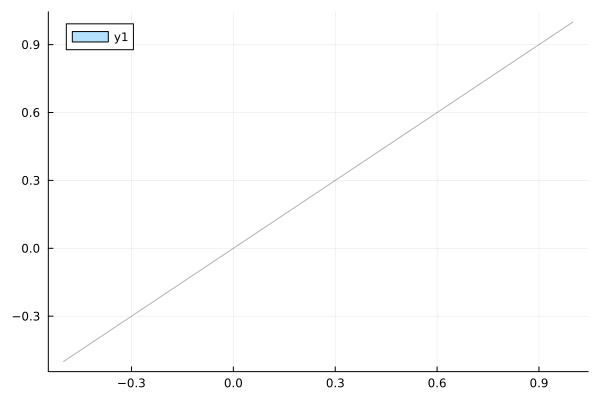

In [10]:
plot(tm)

In [11]:
# it is a group of polynomials with different error \in [-26.7352, 62.5374]
# let t = x - x0, then we can get the polynomials
pols = f(tm)   

 - 8.361114845930823 - 47.06114518304093 t - 38.35444517482823 t² + 90.43760911956869 t³ + [-26.7352, 62.5374]

In [12]:
typeof(pols)

TaylorModel1{Float64, Float64}

In [13]:
pols.pol  # where t = x - x0

 - 8.361114845930823 - 47.06114518304093 t - 38.35444517482823 t² + 90.43760911956869 t³ + 𝒪(t⁴)

In [14]:
typeof(pols.pol)

Taylor1{Float64}

In [15]:
?Taylor1

search: Taylor1 set_taylor1_varname TaylorModel1 RTaylorModel1 TaylorN



```
Taylor1{T<:Number} <: AbstractSeries{T}
```

DataType for polynomial expansions in one independent variable.

**Fields:**

  * `coeffs :: Array{T,1}` Expansion coefficients; the $i$-th   component is the coefficient of degree $i-1$ of the expansion.
  * `order  :: Int` Maximum order (degree) of the polynomial.

Note that `Taylor1` variables are callable. For more information, see [`evaluate`](@ref).

---

```
Taylor1([T::Type=Float64], order::Int)
```

Shortcut to define the independent variable of a `Taylor1{T}` polynomial of given `order`. The default type for `T` is `Float64`.

```julia
julia> Taylor1(16)
 1.0 t + 𝒪(t¹⁷)

julia> Taylor1(Rational{Int}, 4)
 1//1 t + 𝒪(t⁵)
```


In [16]:
pols.pol(.5 - x0)  # evaluate 

-21.11046632262456

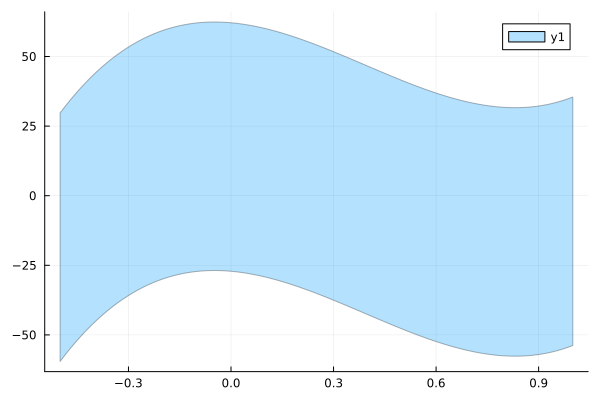

In [17]:
plot(pols)

In [18]:
?@manipulate

`@manipulate expr`

The @manipulate macro lets you play with any expression using widgets. `expr` needs to be a `for` loop. The `for` loop variable are converted to widgets using the [`widget`](@ref) function (ranges become `slider`, lists of options become `togglebuttons`, etc...). The `for` loop body is displayed beneath the widgets and automatically updated as soon as the widgets change value.

Use `throttle = df` to only update the output after a small time interval `dt` (useful if the update is costly as it prevents multiple updates when moving for example a slider).

## Examples

```julia
using Colors

@manipulate for r = 0:.05:1, g = 0:.05:1, b = 0:.05:1
    HTML(string("<div style='color:#", hex(RGB(r,g,b)), "'>Color me</div>"))
end

@manipulate throttle = 0.1 for r = 0:.05:1, g = 0:.05:1, b = 0:.05:1
    HTML(string("<div style='color:#", hex(RGB(r,g,b)), "'>Color me</div>"))
end
```

[`@layout!`](@ref) can be used to adjust the layout of a manipulate block:

```julia
using Interact

ui = @manipulate throttle = 0.1 for r = 0:.05:1, g = 0:.05:1, b = 0:.05:1
    HTML(string("<div style='color:#", hex(RGB(r,g,b)), "'>Color me</div>"))
end
@layout! ui dom"div"(observe(_), vskip(2em), :r, :g, :b)
ui
```


In [19]:
?slider

search: slider rangeslider splitdrive



```
function slider(vals::AbstractArray;
                value=medianelement(vals),
                label=nothing, readout=true, kwargs...)
```

Creates a slider widget which can take on the values in `vals`, and updates observable `value` when the slider is changed.


In [20]:
?interval

search: interval Interval IntervalBox interval_part IntervalArithmetic



```
interval(a, b)
```

`interval(a, b)` checks whether [a, b] is a valid `Interval`, using the (non-exported) `is_valid_interval` function. If so, then an `Interval(a, b)` object is returned; if not, a warning is printed and the empty interval is returned.


In [21]:
typeof(a.lo)

Float64

In [22]:
?plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr(attr)` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.

---

Extract a subplot from an existing plot.

# Examples

```julia-repl
julia> p1, p2 = plot(1:2), plot(10:20)
julia> pl = plot(p1, p2)  # plot containing 2 subplots

julia> plot(pl.subplots[1])  # extract 1st subplot as a standalone plot
julia> plot(pl.subplots[2])  # extract 2nd subplot as a standalone plot
```

---

REPL.Message("Extended help is available with `??`", (color = :cyan, bold = true))


In [24]:
?ylims

search: ylims ylims!



```
ylims([plt])
```

Returns the y axis limits of the current plot or subplot


In [25]:
@manipulate for n in slider(1:10, value=1), y in 1:100
    # create a taylor model for identity function 
    # for some large values of x, we need relate f(x) to f(r) for r in [-a, a]
    xx = TaylorModel1(n, x0, a)
    
    # get the taylor model of the target function
    ff = f(xx)
    
    # plot the target function in the interval a
    fig = plot(a.lo:.01:a.hi, f, lw=3, leg=false)
    
    # plot the expansion point
    scatter!(fig, [x0], [f(x0)])
    
    # plot the interval (errors) bound 
    plot!(fig, ff)
    
    # plot the expansion 
    # because t = x - x0, where x0 is the expansion point and the x is a point near x0 in the interval a.
    plot!(fig, x->ff.pol(x - x0), lw=2, ls=:dash)
    
    # use ylims to zoom in
    ylims!(fig, -y, y)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/alvin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/alvin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/alvin/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/home/alvin/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/home/alvin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007f63664939e0, Task (runnable) @0x00007f63664939e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"768718214808278223\",\"id\":\"10909842280585245322\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"768718214808278223\",\"id\":\"9593329684423628568\",\"type\":\"observable\"})};\n    var self =